In [ ]:
# # # import cv2
# # ##TODO : REMOVE VALIDATION SET- ISME convert into sets wale me dikkat aayegi
# # ##TODO : DONT USE AUGMENTED DATA ON TRAINING SET
# # ##TODO : LOOK INTO THE LAYERS WHERE ACT FUNC ARE RELU BUT IN MOBILENET V2 WE DONT USE RELU
# 
# # import numpy as np
# # import tensorflow as tf
# # from tensorflow.keras.applications import MobileNetV2
# # from tensorflow.keras.layers import Dense,BatchNormalization
# # from tensorflow.keras import layers
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # 
# # # Define paths to the finger vein dataset directory
# # data_dir = "FVData"
# # train_dir = "FVData/train"
# # test_dir = "FVData/test"
# # 
# # # Image preprocessing function
# # def preprocess_image(img):
# #     return img / 255.0  # Normalize to the range [0, 1]
# # 
# # # Data generators
# # batch_size = 32
# # image_size = (224, 224)
# # 
# # #ImageDataGenerator is used for normalizing the pixel values to the range [0, 1],
# # train_datagen = ImageDataGenerator(rescale=1./255)
# # train_generator = train_datagen.flow_from_directory(
# #     train_dir,
# #     target_size=image_size,
# #     batch_size=batch_size,
# #     class_mode='categorical',
# #     shuffle=False  # Important: Set shuffle to False for feature extraction
# # )
# # 
# # test_datagen = ImageDataGenerator(rescale=1./255)
# # test_generator = test_datagen.flow_from_directory(
# #     test_dir,
# #     target_size=image_size,
# #     batch_size=batch_size,
# #     class_mode='categorical',
# #     shuffle=False  # Important: Set shuffle to False for feature extraction
# # )
# # 
# # # Model definition for feature extraction with MobileNetV2 activations
# # base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# # 
# # for layer in base_model.layers:
# #     layer.trainable = False
# # 
# # model = Sequential([
# #     base_model,
# #     tf.keras.layers.GlobalAveragePooling2D(),
# #     Dense(256, activation="relu"),
# #     layers.BatchNormalization(),
# #     Dense(128, activation="relu"),
# #     layers.BatchNormalization(),
# #     Dense(64, activation="relu"),
# #     layers.BatchNormalization()
# # ])
# # 
# # # Extract features
# # train_features = model.predict(train_generator)
# # test_features = model.predict(test_generator)
# # 
# # # Save the features
# # np.save("train_features.npy", train_features)
# # np.save("test_features.npy", test_features)
# 
# 
# import os
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.layers import Dense,BatchNormalization
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Define paths to the finger vein dataset directory
# data_dir = "FVData"
# train_dir = "Data/FVData/train"
# test_dir = "Data/FVData/test"
# 
# # Image preprocessing function
# def preprocess_image(img):
#     return img / 255.0  # Normalize to the range [0, 1]
# 
# # Data generators
# batch_size = 32
# image_size = (224, 224)
# 
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False  # Important: Set shuffle to False for feature extraction
# )
# 
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical',
#     shuffle=False  # Important: Set shuffle to False for feature extraction
# )
# 
# # Model definition for feature extraction with MobileNetV2 activations
# base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
# 
# for layer in base_model.layers:
#     layer.trainable = False
# 
# model = Sequential([
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     Dense(256, activation="relu"),
#     layers.BatchNormalization(),
#     Dense(128, activation="relu"),
#     layers.BatchNormalization(),
#     Dense(64, activation="relu"),
#     layers.BatchNormalization()
# ])
# 
# # Extract features
# train_features = model.predict(train_generator)
# test_features = model.predict(test_generator)
# 
# # Save the features and labels
# np.save("train_features.npy", train_features)
# np.save("train_labels.npy", train_generator.classes)
# np.save("test_features.npy", test_features)
# np.save("test_labels.npy", test_generator.classes)

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the finger vein dataset directory
data_dir = "FVData"
train_dir = "Data/FVData/train"
test_dir = "Data/FVData/test"

# Image preprocessing function
def preprocess_image(img):
    return img / 255.0  # Normalize to the range [0, 1]

# Data generators
batch_size = 32
image_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False for feature extraction
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False for feature extraction
)

# Model definition for feature extraction with MobileNetV2 activations
base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation="relu"),
    BatchNormalization(),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dense(64, activation="relu"),
    BatchNormalization()
])

# Extract features
train_features = model.predict(train_generator)
test_features = model.predict(test_generator)

# Save the features and labels
np.save("train_features.npy", train_features)
np.save("train_labels.npy", train_generator.classes)
np.save("test_features.npy", test_features)
np.save("test_labels.npy", test_generator.classes)


Found 98170 images belonging to 96 classes.
Found 24518 images belonging to 96 classes.


In [10]:
model.save("finger_vein_feature_extraction_model.h5")

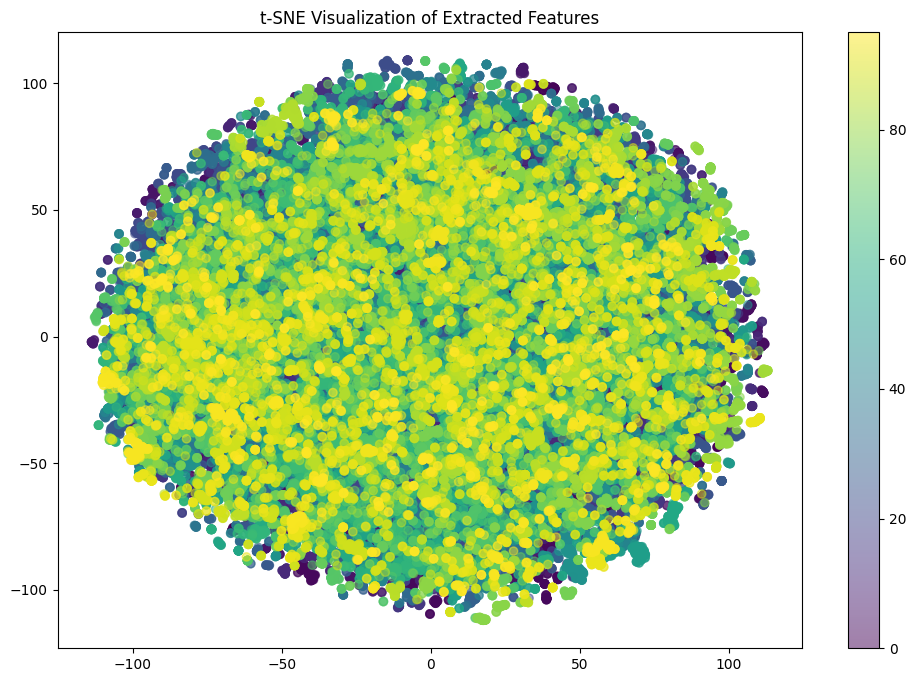

Validation Accuracy: 24.05%


In [2]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load the features and labels
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy")

# Visualize features using t-SNE
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(train_features)

# Scatter plot for t-SNE visualization
plt.figure(figsize=(12, 8))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Extracted Features')
plt.colorbar()
plt.show()

# Split the data for training a simple classifier
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Train a simple logistic regression classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the classifier on the validation set
y_pred = classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")


In [2]:
import numpy as np

# Load features
train_features = np.load("train_features.npy")

# Display information
print("Shape of train_features array:", train_features.shape)
print("Number of images:", train_features.shape[0])
print("Number of features extracted in each image:", train_features.shape[1])
print("Example feature vector for the first sample:", train_features[0])
print("Minimum value in features:", np.min(train_features))
print("Maximum value in features:", np.max(train_features))
print("Mean value of features:", np.mean(train_features))
print("Standard deviation of features:", np.std(train_features))


Shape of train_features array: (98170, 64)
Number of images: 98170
Number of features extracted in each image: 64
Example feature vector for the first sample: [0.         0.         0.         0.         0.         0.548177
 0.         0.         0.137829   0.24906772 1.962604   0.
 0.09235316 0.14206828 0.         0.         0.         0.
 0.         0.         0.         0.         0.10447434 0.
 0.         0.5412202  0.         0.32115975 0.         1.2252535
 0.         0.89436936 0.05543861 0.401969   0.         0.
 1.2443187  0.86253667 0.         0.         0.00542483 0.
 0.         0.         0.         0.2699899  0.38536853 0.18143195
 0.30230373 1.0471122  0.         1.5027684  0.5105364  0.
 1.1336656  1.7793729  0.1920959  0.         0.         0.
 0.28167525 0.32373503 0.         0.05034773]
Minimum value in features: 0.0
Maximum value in features: 3.1255028
Mean value of features: 0.2335349
Standard deviation of features: 0.3744324


In [3]:
import numpy as np

# Load labels
train_labels = np.load("train_labels.npy")

# Display information
print("Shape of train_labels array:", train_labels.shape)
print("Number of labels:", len(train_labels))
print("Unique labels:", np.unique(train_labels))
print("Distribution of labels:")
for label in np.unique(train_labels):
    count = np.sum(train_labels == label)
    print(f"Label {label}: {count} samples")


Shape of train_labels array: (98170,)
Number of labels: 98170
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Distribution of labels:
Label 0: 1037 samples
Label 1: 1037 samples
Label 2: 1037 samples
Label 3: 1037 samples
Label 4: 1037 samples
Label 5: 1037 samples
Label 6: 1037 samples
Label 7: 1037 samples
Label 8: 1037 samples
Label 9: 1037 samples
Label 10: 1037 samples
Label 11: 1037 samples
Label 12: 1037 samples
Label 13: 1037 samples
Label 14: 1037 samples
Label 15: 1037 samples
Label 16: 1037 samples
Label 17: 1037 samples
Label 18: 864 samples
Label 19: 1037 samples
Label 20: 1037 samples
Label 21: 1037 samples
Label 22: 1037 samples
Label 23: 1037 samples
Label 24: 1037 samples
Label 25: 1037 samples
Label 26: 1037 samp

In [4]:
import numpy as np

# Load features
test_features = np.load("test_features.npy")

# Display information
print("Shape of test_features array:", test_features.shape)
print("Number of samples in test_features:", len(test_features))

# Load labels
test_labels = np.load("test_labels.npy")

# Display information
print("\nShape of test_labels array:", test_labels.shape)
print("Number of labels in test_labels:", len(test_labels))
print("Unique labels in test_labels:", np.unique(test_labels))
print("Distribution of labels in test_labels:")
for label in np.unique(test_labels):
    count = np.sum(test_labels == label)
    print(f"Label {label}: {count} samples")


Shape of test_features array: (24518, 64)
Number of samples in test_features: 24518

Shape of test_labels array: (24518,)
Number of labels in test_labels: 24518
Unique labels in test_labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Distribution of labels in test_labels:
Label 0: 259 samples
Label 1: 259 samples
Label 2: 259 samples
Label 3: 259 samples
Label 4: 259 samples
Label 5: 259 samples
Label 6: 259 samples
Label 7: 259 samples
Label 8: 259 samples
Label 9: 259 samples
Label 10: 259 samples
Label 11: 259 samples
Label 12: 259 samples
Label 13: 259 samples
Label 14: 259 samples
Label 15: 259 samples
Label 16: 259 samples
Label 17: 259 samples
Label 18: 216 samples
Label 19: 259 samples
Label 20: 259 samples
Label 21: 259 samples
Lab

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np

# Load the learned features and labels
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy")
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")

# Split the data for training and validation
train_features, val_features, train_labels, val_labels = train_test_split(
    train_features, train_labels, test_size=0.2, random_state=42
)

# Model definition
model = Sequential([
    Dense(256, activation="relu", input_shape=(train_features.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    BatchNormalization(),
    Dense(len(np.unique(train_labels)), activation="softmax")  # Assuming labels start from 1
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_features, train_labels,
    epochs=20,
    batch_size=32,
    validation_data=(val_features, val_labels),
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_results = model.evaluate(test_features, test_labels)
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])


Epoch 1/20
2455/2455 [==============================] - 8s 2ms/step - loss: 4.0135 - accuracy: 0.0862 - val_loss: 3.4759 - val_accuracy: 0.1688
Epoch 2/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.6571 - accuracy: 0.1327 - val_loss: 3.3253 - val_accuracy: 0.1917
Epoch 3/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.5598 - accuracy: 0.1480 - val_loss: 3.2027 - val_accuracy: 0.2212
Epoch 4/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.5060 - accuracy: 0.1594 - val_loss: 3.1262 - val_accuracy: 0.2363
Epoch 5/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.4661 - accuracy: 0.1653 - val_loss: 3.0863 - val_accuracy: 0.2398
Epoch 6/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.4311 - accuracy: 0.1705 - val_loss: 3.0774 - val_accuracy: 0.2461
Epoch 7/20
2455/2455 [==============================] - 6s 2ms/step - loss: 3.4144 - accuracy: 0.1753 - val_loss: 3.0336 - val_accuracy:

In [4]:
# Save the model
model.save("finger_vein_classifier_model.h5")

In [15]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Load the learned features and corresponding labels
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Model definition for the classifier
classifier_model = Sequential([
    Dense(256, activation="relu", input_shape=(train_features.shape[1],)),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(len(np.unique(train_labels)), activation="softmax")
])

# Compile the model
classifier_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the classifier
classifier_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Save the trained classifier model
classifier_model.save("finger_vein_classifier_model.h5")

Epoch 1/20
2455/2455 [==============================] - 6s 2ms/step - loss: 4.4065 - accuracy: 0.0271 - val_loss: 4.0885 - val_accuracy: 0.0678
Epoch 2/20
2455/2455 [==============================] - 5s 2ms/step - loss: 4.1244 - accuracy: 0.0577 - val_loss: 3.8863 - val_accuracy: 0.0981
Epoch 3/20
2455/2455 [==============================] - 5s 2ms/step - loss: 4.0239 - accuracy: 0.0725 - val_loss: 3.7805 - val_accuracy: 0.1127
Epoch 4/20
2455/2455 [==============================] - 5s 2ms/step - loss: 3.9605 - accuracy: 0.0826 - val_loss: 3.7286 - val_accuracy: 0.1241
Epoch 5/20
2455/2455 [==============================] - 5s 2ms/step - loss: 3.9221 - accuracy: 0.0882 - val_loss: 3.6662 - val_accuracy: 0.1366
Epoch 6/20
2455/2455 [==============================] - 5s 2ms/step - loss: 3.8847 - accuracy: 0.0923 - val_loss: 3.6348 - val_accuracy: 0.1419
Epoch 7/20
2455/2455 [==============================] - 5s 2ms/step - loss: 3.8614 - accuracy: 0.0978 - val_loss: 3.5998 - val_accuracy:

NameError: name 'cv2' is not defined

Failed to load the image.
